In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor

# Alur kerja AI
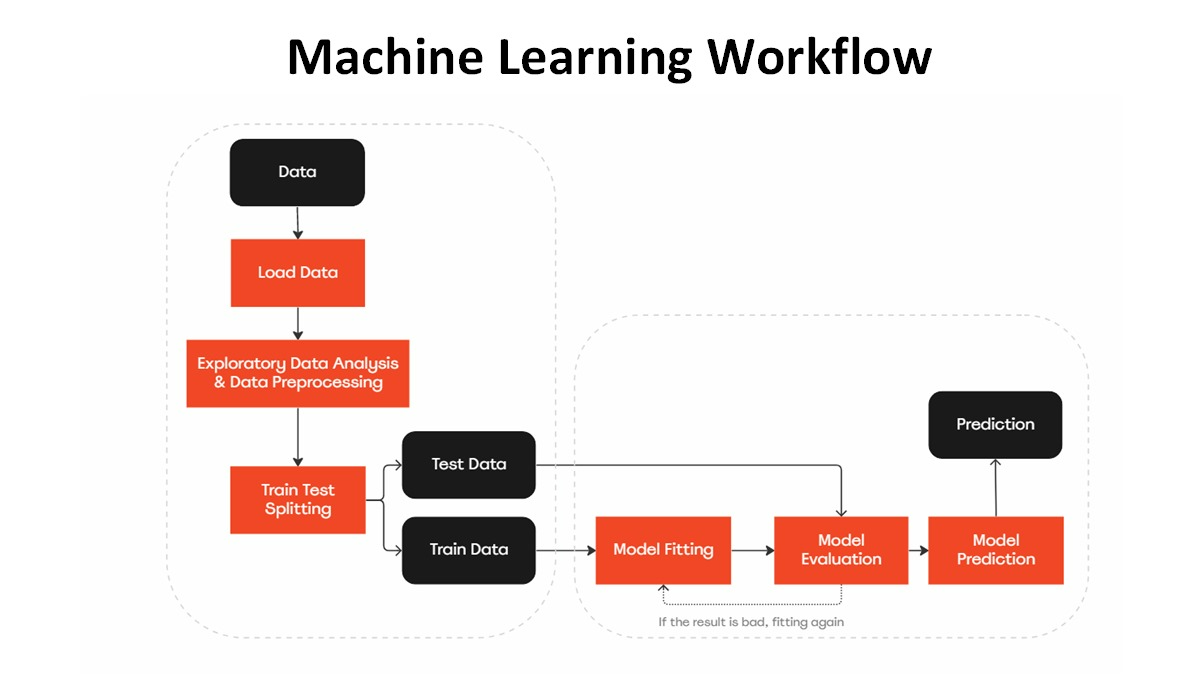

In [41]:
# load the data
file_path = '../Data/Raw/VRE_production_in_france_data_2020_2021.csv'
unfiltered_data = pd.read_csv(file_path)
data = unfiltered_data[unfiltered_data['Source'] == 'Wind' ].copy()
# data = unfiltered_data[unfiltered_data['Source'] == 'Solar' ]

In [42]:
# Explore the dataset
# print(data.head())
print(data.info())
# print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 7184 entries, 45 to 14358
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           7184 non-null   object 
 1   Date and Hour       7184 non-null   object 
 2   Date                7184 non-null   object 
 3   StartHour           7184 non-null   object 
 4   EndHour             7184 non-null   object 
 5   Source              7184 non-null   object 
 6   Production          7184 non-null   int64  
 7   dayOfYear           7184 non-null   int64  
 8   dayName             7184 non-null   object 
 9   monthName           7184 non-null   object 
 10  GHI                 7184 non-null   int64  
 11  DNI                 7184 non-null   int64  
 12  Wind_Speed_2m       7184 non-null   float64
 13  Wind_Direction_2m   7184 non-null   int64  
 14  Temp_2m             7184 non-null   float64
 15  RH_2m               7184 non-null   float64
 16  Pressure 

In [43]:
# Encode categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [44]:
# Split data into features and target
X = data.drop(['Production', 'Source'], axis=1)  # Replace 'production' with your target column
y = data['Production']

In [45]:
# Scale features (optional, depending on the model)
scaler = StandardScaler()
X = scaler.fit_transform(X)

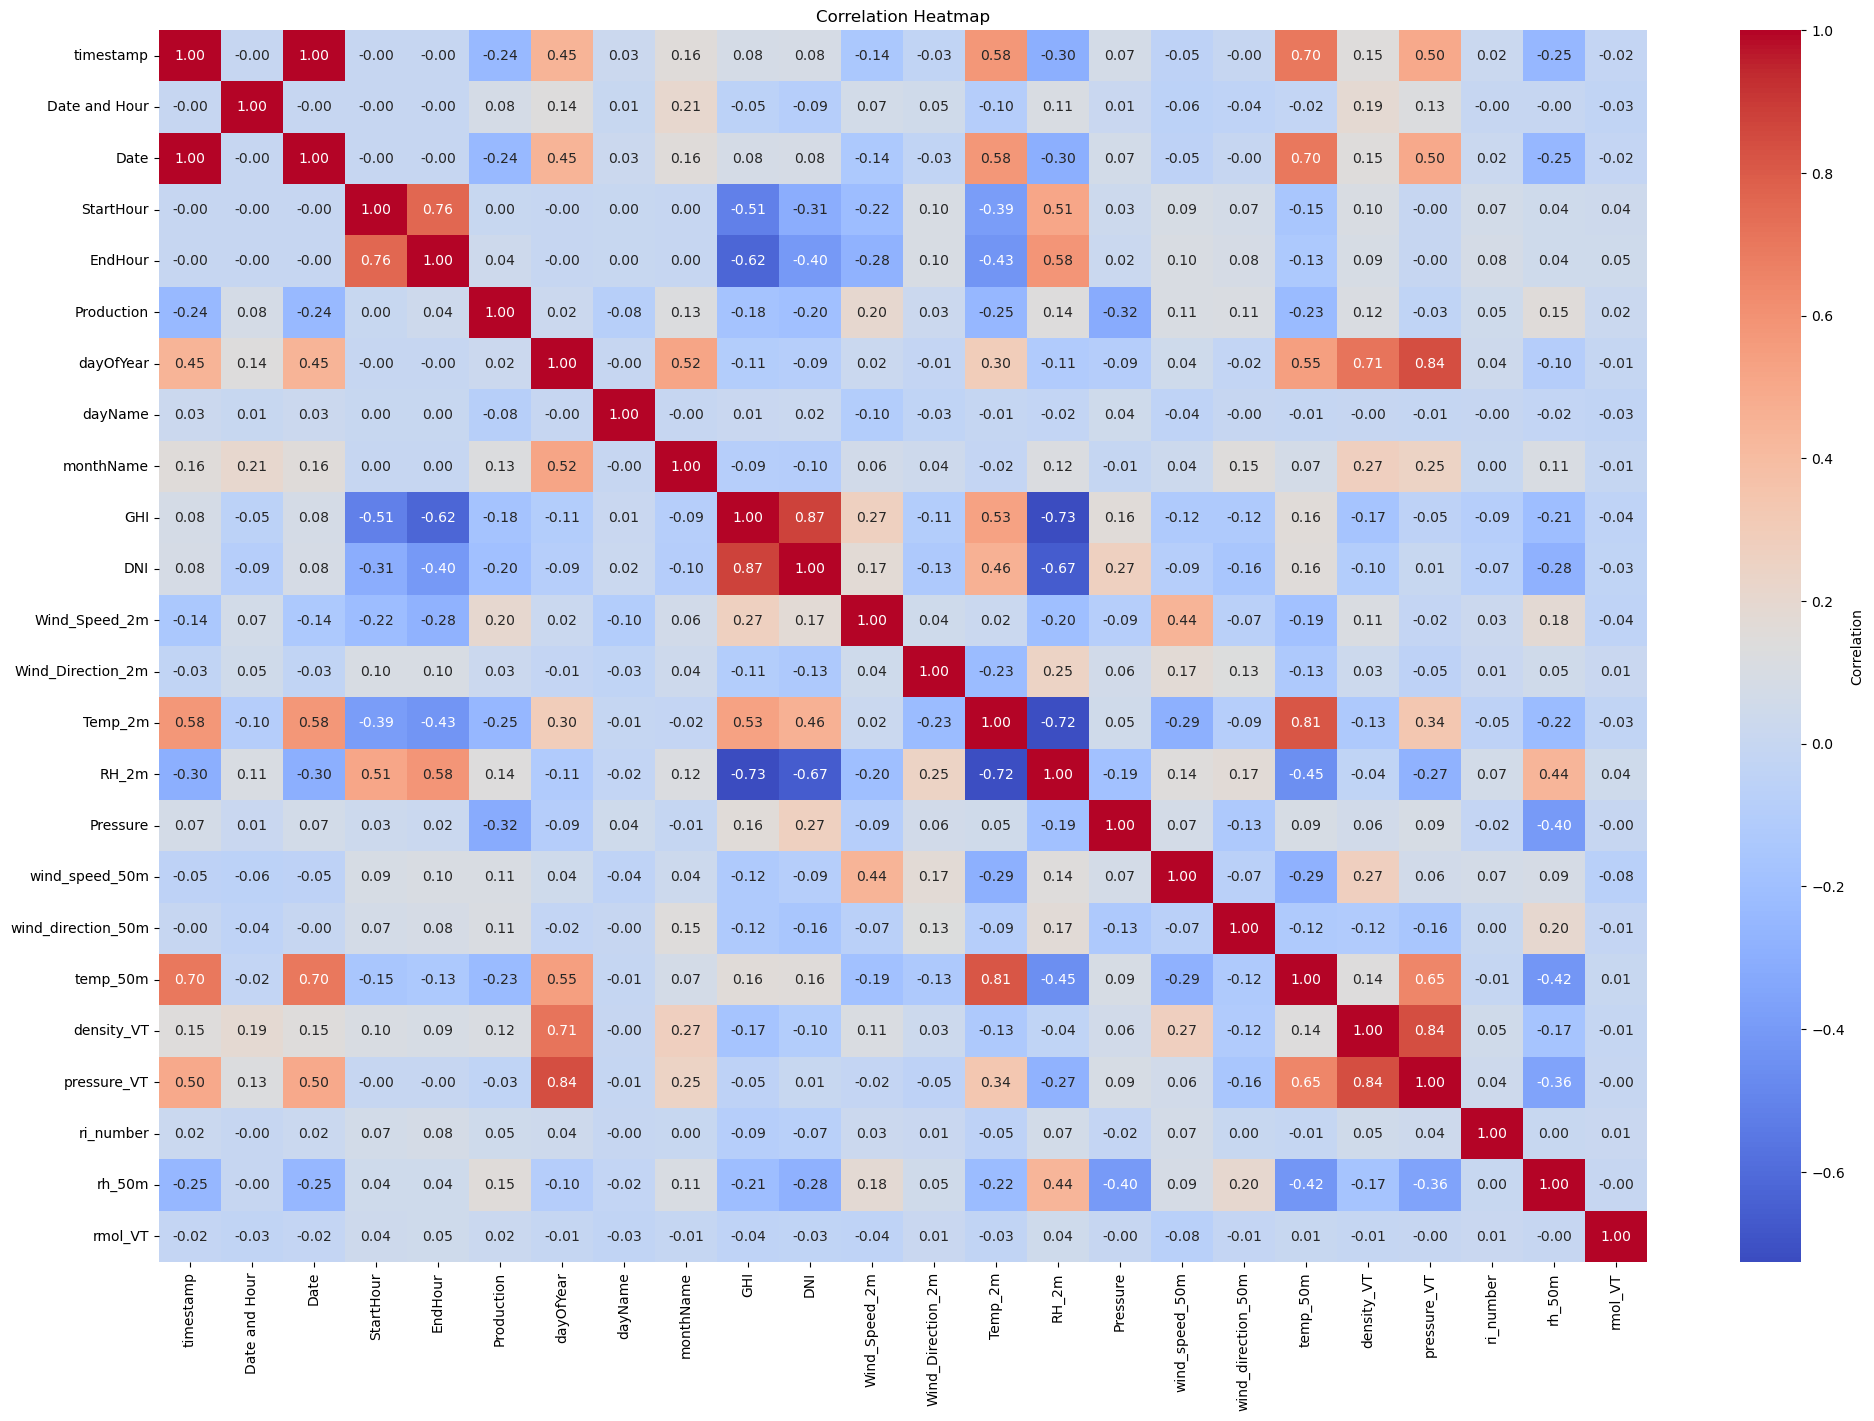

In [46]:
# Compute the correlation matrix
correlation_matrix = data.drop('Source', axis=1).corr()
# Create a heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Correlation'})

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [36]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Train the model (XGBoost)
model = XGBRegressor(
    random_state=42,
    n_estimators=100,     # Number of boosting rounds
    learning_rate=0.1,    # Step size shrinkage
    max_depth=3,          # Maximum tree depth
    subsample=0.8,        # Fraction of samples used for training
    colsample_bytree=0.8  # Fraction of features used for each tree
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [38]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 150.89576717578626
R² Score: 0.9704121351242065


In [39]:
# Save predictions
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('../Data/Processed/Wind_Processed_VRE_GradBoosting.csv', index=False)

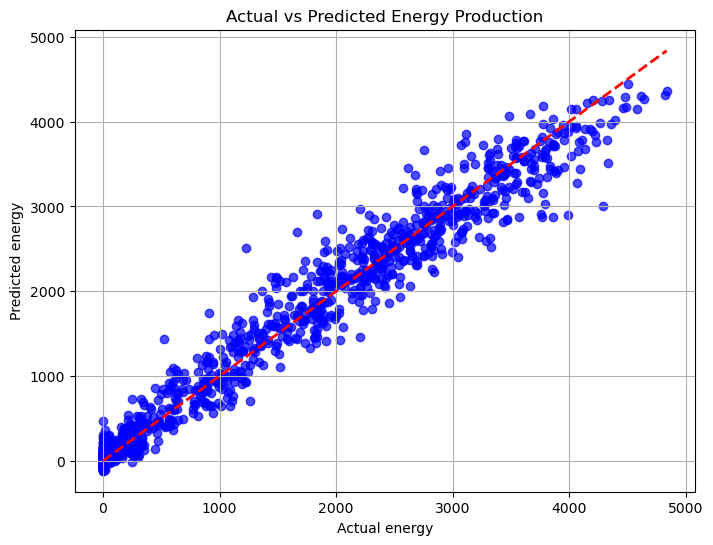

In [40]:
# visualisation
plt.figure(figsize=(8, 6))
plt.scatter(output['Actual'], output['Predicted'], alpha=0.7, color='blue')
plt.plot([output['Actual'].min(), output['Actual'].max()],
         [output['Actual'].min(), output['Actual'].max()],
         color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Energy Production')
plt.xlabel('Actual energy')
plt.ylabel('Predicted energy')
plt.grid(True)
plt.show()